<a href="https://colab.research.google.com/github/dcrp1234/Accelerated_Calculus_Project/blob/main/Final%20Submission/Calculus_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quadratic Surfaces

Demonstration of how a quadreatic equation $x^2 + y^2 + az^2 = 1$ gives a family of surfaces for different values of $a$, for $a<0$ we get a hyperbola, for $a > 0$ an ellipse and at $a = 0$ we get a cylinder of unit radius.

For $a = 0$, the equation holds as $x^2 + y^2 = 1$, which in space is a cylinder as z is an independent variable.

For $a < 0$, the equation represents a hyperboloid as $x^2 + y^2 - |a|z^2 = 1$.

For $a > 0$, the equation in the y-z plane stands as $y^2 + az^2 = 1$, an ellipse, also in the x-z plane it is $x^2 + az^2 = 1$, an ellipse, this concludes that for positive values of a quadratic equation is that of an ellipsoid.  

The code also demonstrates hyperboloids with two sheets, select sheets as 2.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive_output
from IPython.display import display

# Defining z as a function of r
print (" Select sheet = 1 to view the ellipse, cylinder and hyperboloid with one sheet")
print (" Select sheet = 2 too see hyperboloid with 2 sheets.")
def zfunc(r, a, sheet):
    if sheet == 1:
      return np.sqrt((1 - r**2) / a)
    else:
      return np.sqrt((1 + r**2) / a)

# Creating graph based on value of a
def data(a, sheet):
    theta = np.linspace(0, 2 * np.pi)
    if a == 0:
        z = np.linspace(0, 5)
        Z, tc = np.meshgrid(z, theta)
        rc = 1
    elif a > 0:
        r = np.linspace(0, 1)
        rc, tc = np.meshgrid(r, theta)
        Z = zfunc(rc, a, sheet)
    else:
        r = np.linspace(1, 2)
        rc, tc = np.meshgrid(r, theta)
        if sheet == 1:
          Z = zfunc(rc, a, sheet)
        else:
          print("Hyperboloid with two sheets cannot be defined with a < 0")
          return None, None, None
    X = rc * np.cos(tc)
    Y = rc * np.sin(tc);
    return X, Y, Z

# Displaying the graph
def plotfig(a, sheet):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect((1, 1, 1))
    X, Y, Z = data(a, sheet)
    # Check for invalid data if a < 0 for hyperboloid with two sheets
    if X is None or Y is None or Z is None:
        ax.text(0, 0, 0, "Try values greater than 0", color="red", fontsize=12, ha='center')
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_zlim(-2, 2)
        plt.show()
        return
    ax.plot_surface(X, Y, Z, alpha=1)
    ax.plot_surface(X, Y, -Z, alpha=1)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    plt.show()

# Slider widget
a_slide = widgets.FloatSlider(value=0, min=-2, max=2, step=0.05, description='a')

# Sheet selection using dropdown
sheet_select = widgets.Dropdown(options=[(1, 1), (2, 2)], value=1, description='Sheet')

# Link slider to plot function
output = interactive_output(plotfig, {'a': a_slide, 'sheet' : sheet_select})

# Display slider and plot
display(a_slide,sheet_select, output)


 Select sheet = 1 to view the ellipse, cylinder and hyperboloid with one sheet
 Select sheet = 2 too see hyperboloid with 2 sheets.


FloatSlider(value=0.0, description='a', max=2.0, min=-2.0, step=0.05)

Dropdown(description='Sheet', options=((1, 1), (2, 2)), value=1)

Output()

# Surface Area
### General Formula for Surface Area
The surface area is given by:

$
\text{Area} = \iint_R \left\| \frac{\partial S}{\partial u} \times \frac{\partial S}{\partial v} \right\| \, du \, dv
$

Alternatively, the formula can be expressed using the coefficients of the first fundamental form:

$
\text{Area} = \iint_R \sqrt{EG - F^2} \, du \, dv
$

where:
- $ E = \left\langle \frac{\partial S}{\partial u}, \frac{\partial S}{\partial u} \right\rangle $,
- $ F = \left\langle \frac{\partial S}{\partial u}, \frac{\partial S}{\partial v} \right\rangle $,
- $ G = \left\langle \frac{\partial S}{\partial v}, \frac{\partial S}{\partial v} \right\rangle $.

### Surface Area of the Unit Sphere
For the unit sphere, $ x^2 + y^2 + z^2 = 1 $, spherical coordinates are used to parametrize the surface as:

$
S(u, v) = (\cos u \sin v, \sin u \sin v, \cos v)
$

where $ u \in [0, 2\pi] $ and $ v \in [\cos^{-1}(h), \frac{\pi}{2}] $. Substituting into the formula and simplifying yields the area:

$
\text{Area} = \int_0^{2\pi} \int_{v_0}^{\pi/2} \sin v \, dv \, du = 2\pi h
$

This shows that the surface area of the spherical strip increases linearly with the height $h $.

### Surface Area of the Ellipsoid
For the ellipsoid $ x^2 + y^2/4 + z^2 = 1 $, a modified cylindrical parametrization is used:

$
S(u, v) = (\sqrt{1 - u^2} \cos v, 2\sqrt{1 - u^2} \sin v, u)
$

where $ u \in [0, h] $ and $ v \in [0, 2\pi] . $The surface area is given by a more complex integral:

$
\text{Area} = \int_0^{2\pi} \int_0^h \sqrt{4 - 3(1 - u^2)\sin^2 v} \, du \, dv
$

The ellipsoid's integral is computationally challenging, so Python is recommended to evaluate it numerically. A graph plots the surface area of the ellipsoid’s strip as a function of $ h $. The results reveal a nearly linear relationship between the surface area and $ h $, with the variation approximated by a linear equation $ 10.7392h $.

The dotted line on the graph provides a comparison between the computed surface area and the linear approximation, showing close agreement.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from ipywidgets import FloatSlider, interactive

# Function to calculate the integrand
def integrand(u, v):
    return np.sqrt(4 - 3 * (1 - u**2) * np.sin(v)**2)

# Function to compute the surface area
def compute_surface_area(dh=0.01):
    Alist = [0]
    hlist = [0]
    A, h = 0, 0
    while h < 1:
        dA = dblquad(integrand, 0, np.pi / 2, h, h + dh)
        A += 4 * dA[0]
        h += dh
        Alist.append(A)
        hlist.append(h)
    Area = Alist[-1]

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(hlist, Alist, 'r', label='Surface area')
    plt.plot([0, 1], [0, Area], ':b', label=f'Area: {Area:.4f}')
    plt.xlim(0, 1)
    plt.xlabel('Height $h$')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.ylim(0, 11)
    plt.ylabel('Surface area of ellipsoidal strip')
    plt.yticks(np.arange(0, 11.1, 1))
    plt.legend()
    plt.grid('on')
    plt.show()

# Slider for adjusting step size
dh_slider = FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='dh')

# Interactive widget
interactive_plot = interactive(compute_surface_area, dh=dh_slider)
interactive_plot


interactive(children=(FloatSlider(value=0.01, description='dh', max=0.1, min=0.001, step=0.001), Output()), _d…

# Gradient
For a scalar-valued function \( f(x, y) \) in two variables, the gradient is a vector that points in the direction of the steepest ascent of the surface and is given by:
$
\text{Gradient of a surface: } \nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$

For a 3D surface defined by \( f(x, y, z) \), the gradient generalizes to:

$
\text{Gradient in 3D: } \nabla f(x, y, z) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right)
$

This code demonstrates the visualization of a **scalar field** and its gradient vector in both 3D and 2D. The scalar field is defined by the function $ F(x, y) = x + 2\sin(x + y) $, which assigns a scalar value to each point in the $x-y$ plane.

The left plot is a 3D surface that shows how the function varies in space, with the red arrow representing a 3D vector, potentially a gradient or directional vector, at the origin.

The right plot provides a 2D **contour plot**, which projects the scalar field onto the $z = 0$ plane. The contour lines represent **level curves**—slices of the 3D surface at constant $z$-values. These curves help visualize the structure of the scalar field from a top-down perspective. A red arrow on the contour plot shows the projection of the 3D vector into the plane, offering insight into how the function's gradient or direction appears in 2D.


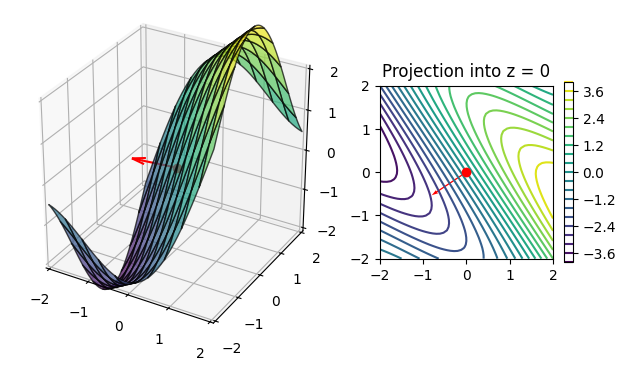

In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

def F(x, y):
  return x+ 2*np.sin(x+y)

x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

N = np.array([-3, -2, 1])/ np.sqrt(14)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios = [1.5,1])

ax1 = fig.add_subplot(gs[0], projection = '3d')
ax1.set_box_aspect((1, 1, 1))
ax1.plot_surface(X, Y, Z, alpha = 0.7, rstride = 5, cstride = 5, edgecolor = 'k', cmap = 'viridis')
ax1.plot(0, 0, 0, 'or')
ax1.quiver(0, 0, 0, N[0], N[1], N[2], length=1, color='r')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_zlim(-2, 2)

ax2 = fig.add_subplot(gs[1])
p = ax2.contour(X, Y, Z, 20)
fig.colorbar(p, shrink = 0.4)
ax2.plot(0, 0, 'or')
ax2.quiver(0, 0, N[0], N[1], color='r', scale_units='xy', scale = 1)
ax2.set_aspect('equal')
ax2.set_title('Projection into z = 0')

fig.tight_layout()
plt.show()

# References

- Exploring University Mathematics with Python, Siri Chongchitnan
- Accelerated Calculus 3, University of Lethbridge